<a href="https://colab.research.google.com/github/hakidaova/MLF/blob/main/MLF_cv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])

# Calculate the covariance matrix:
R=np.matmul(X,X.T)/3 # multiplication in lazy way
#print(X)
#print(X.T)

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
print(U)
u1=U[:,0] # new basis vectors
u2=U[:,1]
print(u1)
print(u2)

# Calculate the coordinates in new orthonormal basis:
#Xi2=np.matmul(X.T, u2)
#Xi1=np.matmul(np.transpose(X), u1)

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimension to array and test it


# Check that you got the original

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
[-0.40455358 -0.9145143 ]
[-0.9145143   0.40455358]


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

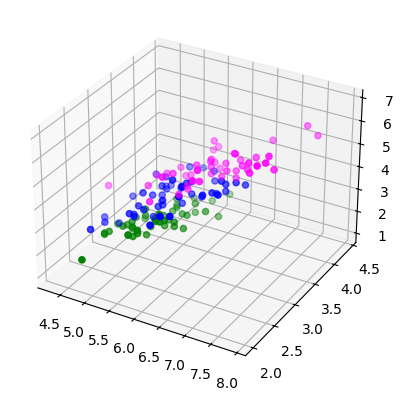

In [8]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,0],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,0],X[y==2,1],X[y==2,2],color='magenta')
plt.show

4.3


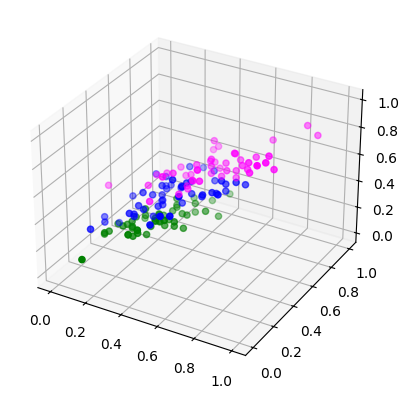

In [29]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
Xscaler = MinMaxScaler() # or use StandardScaler()
Xpp=Xscaler.fit_transform(X) #preprocessed data to interval from 0 to 1

# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')
plt.show

print(np.min(X[:,0])) #prints minimum value of the 0th feature of data

[[ 0.05290845 -0.00491134  0.05999602  0.05975355]
 [-0.00491134  0.03298254 -0.02328082 -0.02111795]
 [ 0.05999602 -0.02328082  0.08952249  0.09149784]
 [ 0.05975355 -0.02111795  0.09149784  0.10086914]]


array([0.23245325, 0.0324682 , 0.00959685])

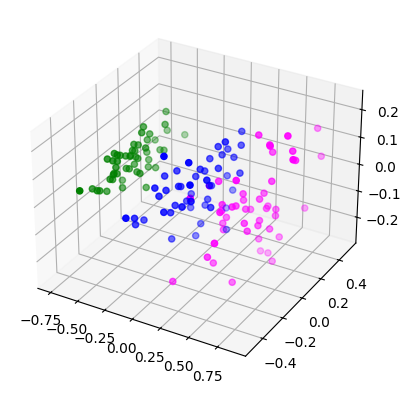

In [32]:
# define PCA object (three components), fit and transform the data
from sklearn import decomposition

#define PCA object (3 components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())

#plot transformed data in 3D
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show

# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_ #"power" of info in certain features

In [37]:
pca.explained_variance_ratio_ #"power" of info in certain features divided into a fraction

array([0.84136038, 0.11751808, 0.03473561])

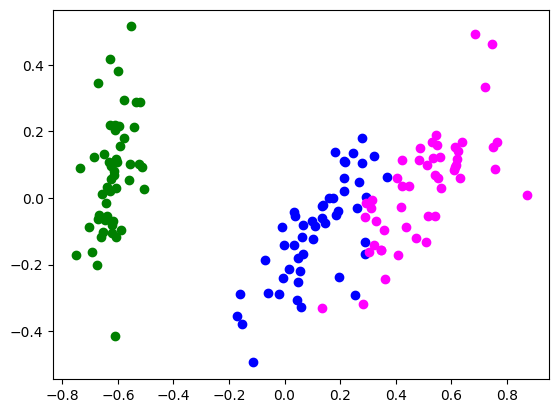

In [38]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y==0,0],Xpca[y==0,1],color='green')
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],color='blue')
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],color='magenta')

(105, 4)
(45, 4)
[[13  0  0]
 [ 0 18  0]
 [ 0  0 14]]


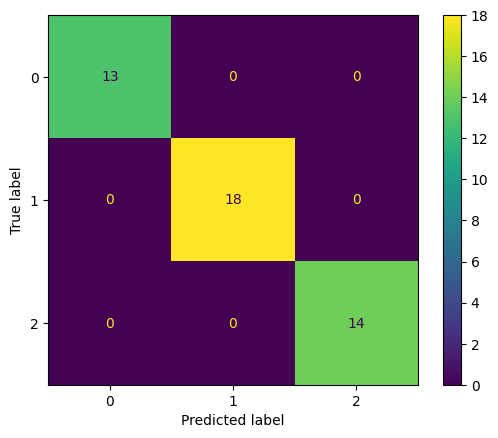

In [97]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
# KNN for  XPP
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpp,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3) # takes 3 neighbor points to classify the data considering these 3 points
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

#numbers tell us how certain class (true label) was classified as any other class or itself (predicted label)

(105, 3)
(45, 3)
[[16  0  0]
 [ 0 11  3]
 [ 0  0 15]]


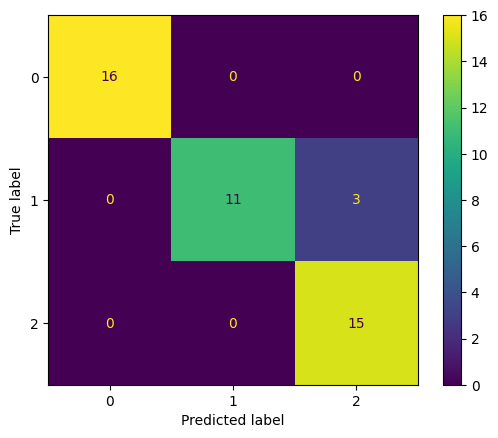

In [104]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).

# KNN for XPCA
# Compare the results with full dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(Xpca,y,test_size=0.3)
print(X1_train.shape)
print(X1_test.shape)
knn2=KNeighborsClassifier(n_neighbors = 3)
knn2.fit(X1_train,y1_train)
Ypred1=knn2.predict(X1_test)

print(confusion_matrix(y1_test,Ypred1))
ConfusionMatrixDisplay.from_predictions(y1_test,Ypred1)


(105, 2)
(45, 2)
[[14  0  0]
 [ 0 14  2]
 [ 0  1 14]]


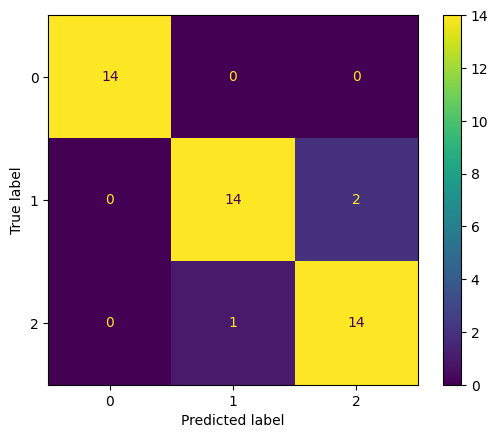

In [103]:
# KNN for XPCA 1st & 2nd features
# Now do the same, but use only 2-dimensional data of original X (first two columns) - the main goal is to reduce the dimensions that would split the data as if all dimensions were used
X1_train, X1_test, y1_train, y1_test = train_test_split(Xpca[:,0:2],y,test_size=0.3)
print(X1_train.shape)
print(X1_test.shape)
knn2=KNeighborsClassifier(n_neighbors = 3)
knn2.fit(X1_train,y1_train)
Ypred1=knn2.predict(X1_test)

print(confusion_matrix(y1_test,Ypred1))
ConfusionMatrixDisplay.from_predictions(y1_test,Ypred1)


(105, 2)
(45, 2)
[[4 4 7]
 [3 9 2]
 [6 2 8]]


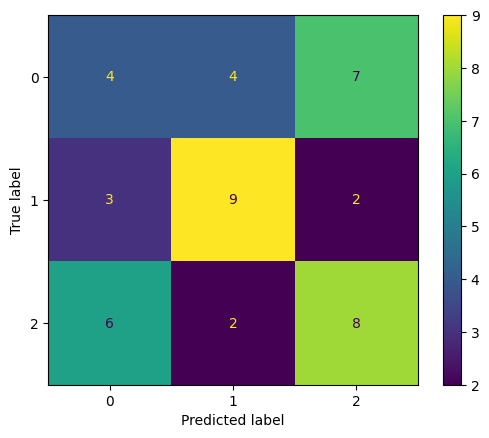

In [105]:

# KNN for XPCA 2nd & 3rd features
# Now do the same, but use only 2-dimensional data of original X (2nd & 3rd columns)
X1_train, X1_test, y1_train, y1_test = train_test_split(Xpca[:,1:3],y,test_size=0.3)
print(X1_train.shape)
print(X1_test.shape)
knn2=KNeighborsClassifier(n_neighbors = 3)
knn2.fit(X1_train,y1_train)
Ypred1=knn2.predict(X1_test)

print(confusion_matrix(y1_test,Ypred1))
ConfusionMatrixDisplay.from_predictions(y1_test,Ypred1)